## Bias and Verification of Standard Errors

Methods/Functions

`mean`, `var`, `RandomState`, `RandomState.chisquare`, `array`, `DataFrame.plot.kde`, `stats.norm.ppf`

### Exercise 24.
Simulate a set of i.i.d. $\chi_{5}^{2}$ random variables and use the method of moments
to estimate the mean and variance.

In [1]:
import numpy as np
rs = np.random.RandomState(19991231)

rvs = rs.chisquare(5, size=10)

mu = rvs.mean()
print(f"The mean is {mu} and the variance is {rvs.var()}")


The mean is 5.018686987866649 and the variance is 7.076920224073575


### Exercise 25.
Compute the asymptotic variance of the method of moment estimator.

In [2]:
err = rvs - mu
mom_errs = np.array([err, err**2 - rvs.var()]).T
nobs = mom_errs.shape[0]

acov = mom_errs.T @ mom_errs / nobs

print("The asymptotic covariance is:")
print(acov)

The asymptotic covariance is:
[[ 7.07692022 -0.14669921]
 [-0.14669921 37.06172824]]


### Exercise 26.
Repeat Exercises 24 and 25 a total of 1000 times.
Examine the finite sample bias of these estimators relative to the true values.

In [3]:
estimates = np.zeros((1000, 2))
acovs = np.zeros((1000,2,2))
for i in range(1000):
    rvs = rs.chisquare(5, size=10)
    
    mu = rvs.mean()
    var =  rvs.var()
    estimates[i] = [mu, var]

    err = rvs - mu
    mom_errs = np.array([err, err**2 - rvs.var()]).T
    nobs = mom_errs.shape[0]
    
    acovs[i] = mom_errs.T @ mom_errs / nobs

bias = estimates.mean(axis=0) - np.array([5, 10])
print(f"The biases are {bias[0]} (mean) and {bias[1]} variance")

    

The biases are 0.030637114579928237 (mean) and -0.6459309147194912 variance


### Exercise 27.
Repeat Exercises 24 and 25 a total of 1000 times.
Compare the covariance of the estimated means and variance (1000 of each) to the asymptotic covariance of the parameters (use the average of the 1000 estimated variance-covariances). Are these close? How does the sample size affect this?

In [4]:
est_errs = estimates - estimates.mean(axis=0)

finite_sample_cov = est_errs.T @ est_errs / 1000
avg_acov = acovs.mean(0)

print("The finite sample covariance is:")
print(finite_sample_cov)

print("The average acov is:")
print(avg_acov / 10)

The finite sample covariance is:
[[ 1.11324227  4.20444024]
 [ 4.20444024 39.84465645]]
The average acov is:
[[ 0.93540691  3.04327717]
 [ 3.04327717 29.41246286]]


### Exercise 28.
In the previous problem, for each parameter, form a standardized parameter estimate as

$$z_{i}=\frac{\sqrt{n}\left(\hat{\theta}_{i}-\theta_{i,0}\right)}{\sqrt{\hat{\Sigma}_{ii}}}$$ 

where

$$\sqrt{n}\left(\hat{\theta}-\theta_{0}\right)\stackrel{d}{\rightarrow} N\left(0,\Sigma\right)$$

so that $\hat{\Sigma}$ is the estimated asymptotic covariance. What percent of these $z_{i}$
are larger in absolute value than 10%, 5% and 1% 2-sided critical values from a normal?

In [5]:
from scipy import stats
import pandas as pd

z = np.zeros((1000, 2))
for i in range(1000):
    err = estimates[i] - np.array([5, 10])
    acov = acovs[i]
    avars = np.diag(acov)
    z[i] = (np.sqrt(10) * err) / np.sqrt(avars) 

results = {}
abs_z = np.abs(z)
for quantile in [.01, .05, .1]:
    cutoff = stats.norm.ppf(1 - quantile/2)
    above = abs_z > cutoff
    results[quantile] = above.mean(0)
results
pd.DataFrame(results, index=["mean", "var"])

,0.01,0.05,0.10
mean,0.062,0.119,0.174
var,0.259,0.323,0.373


### Exercise 29.
Produce a density plot of the $z_{i}$ standardized parameters and compare to a standard normal.

(0, 0.45)

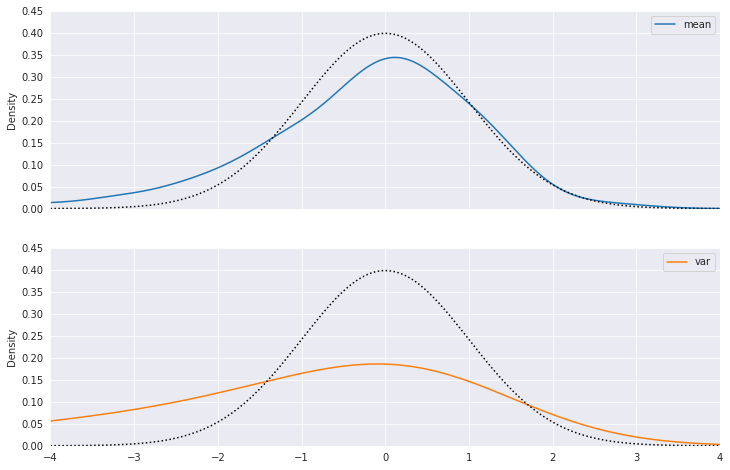

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc("figure", figsize=(12,8))
sns.set_style("darkgrid")
z = pd.DataFrame(z, columns=['mean', 'var'])

x = np.linspace(-4,4,201)
pdf = stats.norm.pdf(x)

ax = z.plot.kde(subplots=True)
ax[0].set_xlim(-4,4)
ax[0].plot(x, pdf, color="black", linestyle=":")
ax[0].set_ylim(0,0.45)

ax[1].set_xlim(-4,4)
ax[1].plot(x, pdf, color="black", linestyle=":")
ax[1].set_ylim(0,0.45)

### Exercise 30.
Repeat the same exercise for the Bernoulli problem from the previous question.

In [7]:
rs = np.random.RandomState(19991231)
sample_size = 25
p = 0.25

population_values = np.array([p, p*(1-p)])
estimates = np.zeros((1000, 2))
acovs = np.zeros((1000,2,2))
for i in range(1000):
    rvs = 1.0 * (rs.random_sample(size=sample_size) <= p) 
    
    mu = rvs.mean()
    var =  rvs.var()
    estimates[i] = [mu, var]

    err = rvs - mu
    mom_errs = np.array([err, err**2 - rvs.var()]).T
    nobs = mom_errs.shape[0]
    
    acovs[i] = mom_errs.T @ mom_errs / nobs

bias = estimates.mean(axis=0) - population_values
print(f"The biases are {bias}")


The biases are [-0.00356  -0.008892]


In [8]:
z = np.zeros((1000, 2))
for i in range(1000):
    err = estimates[i] - population_values
    acov = acovs[i]
    avars = np.diag(acov)
    z[i] = (np.sqrt(sample_size) * err) / np.sqrt(avars) 

z.flat[~np.isfinite(z.flat)] = np.nan

results = {}
abs_z = np.abs(z)
for quantile in [.01, .05, .1]:
    cutoff = stats.norm.ppf(1 - quantile/2)
    above = abs_z > cutoff
    results[quantile] = above.mean(0)
pd.DataFrame(results, index=["mean", "var"])



/home/kevin/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  
/home/kevin/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in greater
  


,0.01,0.05,0.10
mean,0.038,0.095,0.117
var,0.067,0.099,0.154


(0, 0.45)

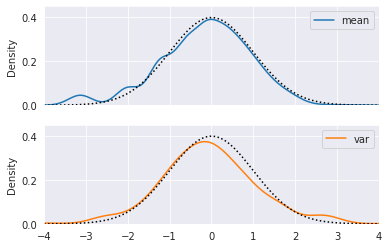

In [9]:
z = pd.DataFrame(z, columns=['mean', 'var'])

ax = z.plot.kde(subplots=True)
ax[0].set_xlim(-4,4)
ax[0].plot(x, pdf, color="black", linestyle=":")
ax[0].set_ylim(0,0.45)

ax[1].set_xlim(-4,4)
ax[1].plot(x, pdf, color="black", linestyle=":")
ax[1].set_ylim(0,0.45)
